# summary

- Bayesian Statistics: prior

- Frequentist Statistics: CI, p-value

- mixtures are **latent** variable models

- **mixing weight** encodes a hidden variable

- computing with mixtures uses basic probabilistic reasoning but can get complicated

- **topic models** are flexible mixtures models for complex data like docs and images

# idea: community detection

graph: blogs are connected with each other

use clustering to identify latent layer of data

- PCA

- Bayesian

# idea: finding structure in music

- oftern latent structure (unknown variables) is modeled as **random**


- e.g., generate music

    first randomly pick a style, then randomly pick an artist, finally generate the music

    observed data is music, latent variables include artist and style



# mixture models

mixture models have latent variables

it is a flexible tool

simple and difficult at the same time

## Gaussian Mixture

### 2 Gaussian mixtures

probability of observed mass (x) belongs to a randomly uniformly picked butterfly is a mixture of 2 Gaussian probability distribution $\phi(x)$

$$
p(x) = \frac{2}{5}\phi (x; -1.25,1) + \frac{3}{5}\phi (x; 2.95,1) 
$$


$$
\phi(x; \mu, \sigma^2) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2 \sigma^2}}dx
$$

$\eta_i$: probability of observing $X_i$

$X_i$: mass of a butterfly of species i

$X_1 \sim N(-1.25, 1), \eta_1 = \frac{2}{5}$

$X_2 \sim N(2.95, 1), \eta_2 = \frac{3}{5}$



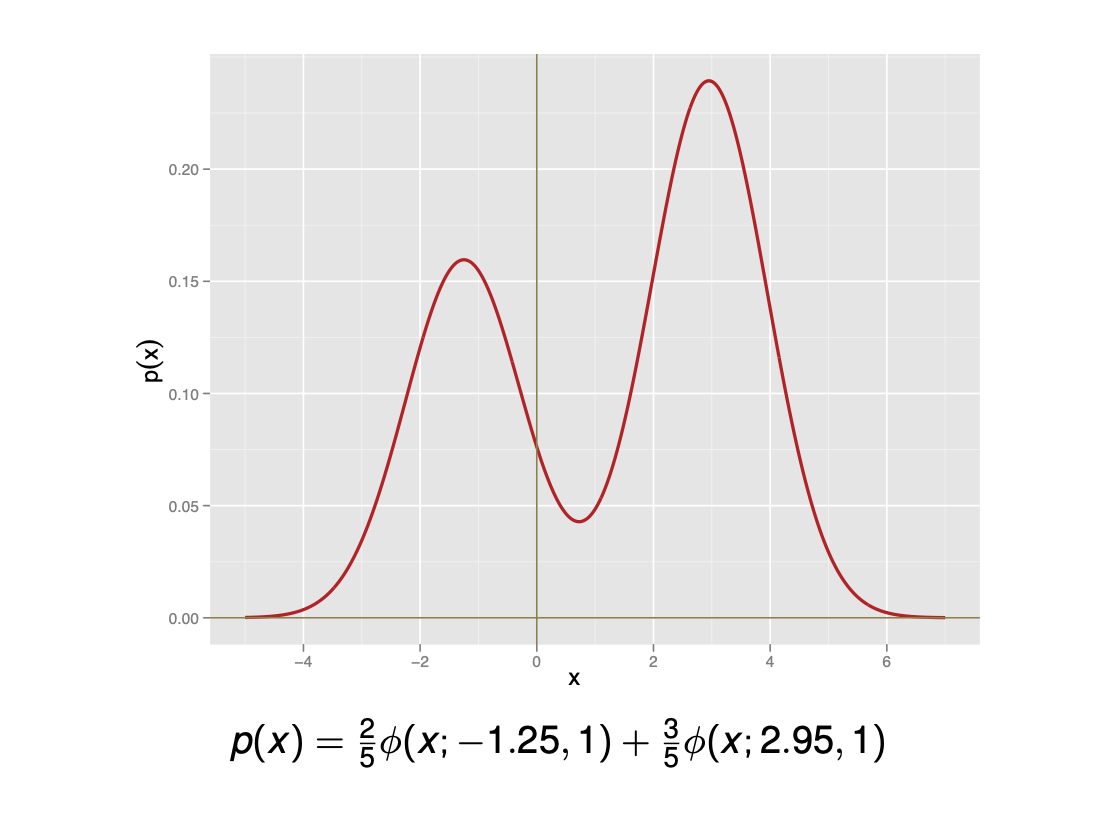

## Bayesian Mixtures = k Gaussian mixtures: Bumps 凸起

- probability of observing x is

$$
p(x) = \sum_{j=1}^k \ \eta_j \ \phi (x; \mu_j, \sigma_j^2)
$$

where $\eta_j$ is the probability of observing jth component

$\mu_j$ is mean, $\sigma_j^2$ is variance


- **membership indicator vector** $\mathbf{z}_i$

    let $\mathbf{z}_i = ([\mathbf{z_i}]_1,...,[\mathbf{z_i}]_k) \in \mathbb{R}^k$ be a random vector,

    where $[\mathbf{z_i}]_j = 1 $ if observed $x_i$ came from the jth component $\phi (x; \mu_j, \sigma_j^2)$

    e.g. $\mathbf{z}_i=(0,0,1,0,0)$ if $k=5$, observed $x_i$ came from the 3th component

every param $\mu, \sigma^2, z$ can be random, we can put a prior for every param

common choice of priors

$$
\begin{align}
&\xi \sim \text{Dirichlet}(\beta)  \text{ where }\beta \in \mathbb{R}_{+}^k \\[1em]
&z_1, ..., z_n |\xi \sim  \text{Multinomial}(\xi) \\[1em]
&\sigma_1^2, ..., \sigma_k^2  \sim \text{Inverse-Gamma}(v_0, \sigma_0^2) \\[1em]
&\mu_j | \sigma_j \sim N(\mu_0, \sigma_j^2) \\[1em]
\end{align}
$$

then infer posterior distribution of following params given data  $x_1, ..., x_n$ by simulating membership indicators $z_{ij}$ 模拟

$\mu_1, ..., \mu_k$

$\sigma_1^2, ..., \sigma_k^2$

$\eta_1, ..., \eta_k$

a mixture of k Gaussian models can have $\frac{5}{3}k$ modes

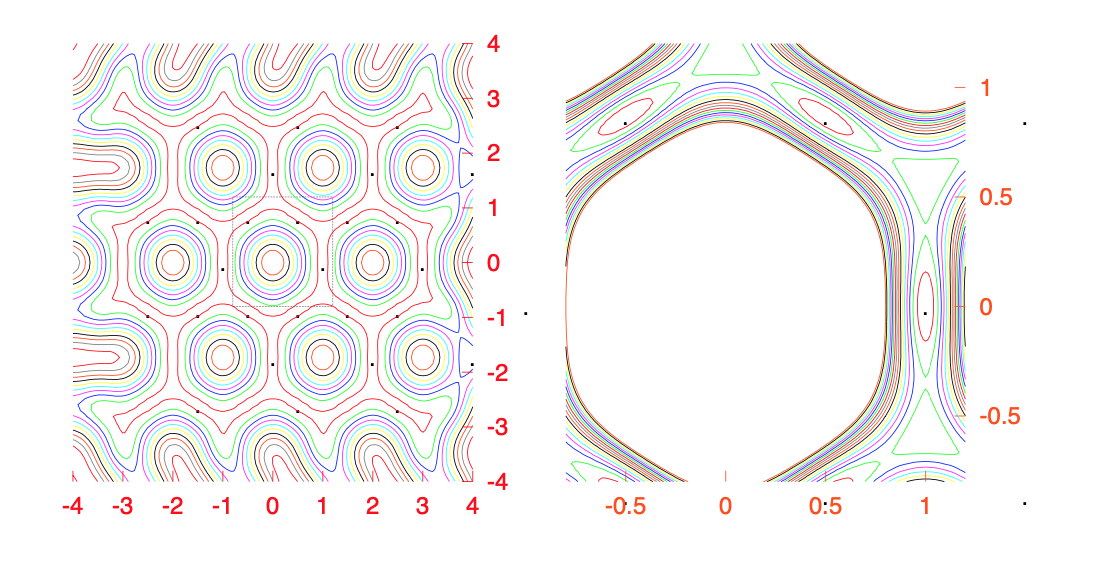

## mixture of 2 populations

- the simplest, most common latent variable model:

    mixture of 2 populations $f$ and $g$

$$
p(x) = \eta f(x) +(1-\eta)g(x)
$$

can think $f$ and $g$ as label of species, $f$: label z = 1, $g$: label z = 0

- hidden variable representation

    define label $Z \sim Bernoulli(\eta)$, 


$$
p(x) = \sum_{z = 0, 1} p(x|z)p(z) = p(x|0)p(0)+p(x|1)p(1) 
$$

since $p(z) = \eta^z(1-\eta)^{(1-z)}$

$$
p(x)=  p(x|0)(1-\eta )+p(x|1)\eta  = \eta p(x|1) + (1-\eta )p(x|0) = \eta f(x)+ (1-\eta )g(x)
$$

with $p(x|1) = f(x)$, $p(x|0) = g(x)$

# Bayesian inference

- Bayesian inference is a method of statistical inference in which Bayes' theorem is used to update the probability for a hypothesis as more evidence becomes available.

- Bayesian inference are carried out as follows:

    1. choose a generative model $p(x|\theta)$ for the data

        the underlying parameter $\theta$ of a model is a **random variable**
        
    2. choose a prior distribution $\pi(\theta)$ 先验分布 that expresses beliefs about the parameter $\theta$ before seeing any data


    3. after observing data $D_n = \left \{ x_1, ..., x_n \right \}$

        update beliefs and calculate the posterior distribution $p(\theta | D_n)$ 后验分布

## Bayes Theorem

- Bayes' theorem

    conditional probability $P(A|B)$ is probability of event A occur conditional on event B occur = probability of event A and B co-occur divided by probability of B occur

$$
P(A|B) = \frac{P(A\cap B)}{P(B)} = \frac{P(B|A)P(A)}{P(B)}
$$

- though Bayes' theorem is a fundamental result of probability theory,

    it has a specific interpretation in Bayesian statistics

$$
\text{Posterior} = \frac{\text{likelihood} \times \text{Prior}}{\text{evidence}}
$$

$A$ is a proposition/hypothesis, e.g., a coin lands on heads 50% of time

$B$ is evidence or new data, e.g., result of 100 trials of coin flip.

$P(A)$ is prior probability of $A$ expresses one's beliefs about $A$ before evidence is taken into account.

$P(B|A)$ is likelihood function, the probability of evidence $B$ given that $A$ is true. quantify degree to which evidence $B$ supports proposition $A$

$P(A|B)$ is posterior probability, the probability of proposition $A$ after taking evidence $B$ into account

After considering new evidence $B$, Baye's theorem updates one's prior beliefs $P(A)$

- The probability of the evidence $P(B)$ can be calculated using law of total probability,

    if $\left\{A_1, A_2, ..., A_n\right\}$ is a partition of sample space, which is set of all outcomes of an experiment

$$
P(B) = P(B|A_1)P(A_1) + ... + P(B|A_n)P(A_n) = \sum_{i=1}^n P(B|A_i)P(A_i)
$$

- use **Bayes Theorem** to connect generative model, prior distribution and posterior distribution


then posterior distribution is proportional to $L_n(\theta)\pi(\theta)$

$$
p(\theta|x_1,...,x_n) = \frac{p(x_1,...,x_n|\theta)\pi(\theta)}{p(x_1,...,x_n)} = \frac{L_n(\theta)\pi(\theta)}{c_n} \propto L_n(\theta)\pi(\theta)
$$

where $L_n(\theta)$ is the **likelihood function**

$$
L_n(\theta) = p(x_1,...,x_n|\theta)=\prod _{i=1}^n p(x_i|\theta)
$$

$c_n$ is **normalizing constant (evidence)**

the joint probability distribution of data

$$
c_n = p(x_1,...,x_n) = \int p(x_1,...,x_n|\theta)\pi(\theta)d\theta = \int L_n(\theta)\pi(\theta)d\theta
$$

$$
\int \frac{L_n(\theta)\pi(\theta)d\theta}{c_n}=1
$$

if samples size is infinite, calculate $c_n$ is time-consuming as calculation involve sums or integrals, 

so often only product of likelihood and prior is considered, since evidence doesn't change in the same analysis

## e.g., Bernoulli model with Beta prior

- $X \sim Bernoulli(\theta)$ with data $D_n = {x_1, ..., x_n}$

$$
\mathbb{P}(x_i = 1 | \theta) = \theta^{x_i}(1-\theta)^{1- x_i}
$$

- **natural prior distribution** on $\theta$ is Beta($\alpha, \beta$) distribution (conjugate prior 共轭先验)

    random variable is $\theta$, params are $\alpha, \beta$

$$
\pi_{\alpha, \beta}(\theta) \propto \theta^{\alpha - 1} (1 - \theta)^{\beta - 1}
$$

let $s = \sum_{i=1}^n x_i$ be the number of successes, $n$ is the number of trails

- **posterior distribution** on $\theta$ is Beta($\alpha +s, \beta +n-s$) distribution

- **posterior mean** is

$$
\begin{align}
\bar \theta 
&= \frac{\alpha +s}{(\alpha +s)+ (\beta +n-s)}\\[1em]
&=\frac{\alpha +s}{\alpha + \beta +n}\\[1em]
&=\frac{n}{\alpha + \beta +n} \hat \theta +\frac{\alpha + \beta}{\alpha + \beta +n} \theta_0\\[1em]
\end{align}
$$

where $\hat \theta = \frac{s}{n}$ is the **MLE estimate** of $\theta$

$\theta_0 = \frac{\alpha }{\alpha + \beta}$ is the **prior mean**

this is an e.g. of **Bayesian shrinkage**, connet to regularization

$\underset{n \to \infty}{\lim}\frac{n}{\alpha + \beta +n} =1$, $\underset{n \to \infty}{\lim}\frac{\alpha + \beta}{\alpha + \beta +n}=0$,

$$
\lim_{n \to \infty}\bar \theta =\hat \theta
$$

we put more weight on $\hat \theta$ than $\theta_0$

### proof

**natural prior distribution** on $\theta$ is proportional to $\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}$

$$
\pi_{\alpha, \beta}(\theta) \propto \theta^{\alpha - 1} (1 - \theta)^{\beta - 1}
$$

$$
\pi_{\alpha, \beta}(\theta) =\underset{\alpha, \beta}{Beta}(\theta)=\frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{\int_{\theta=1}^{1} \theta^{\alpha - 1} (1 - \theta)^{\beta - 1} d\theta}  = \frac{\Gamma (\alpha +\beta )}{\Gamma (\alpha)+\Gamma (\beta )}\left [ \theta^{\alpha - 1} (1 - \theta)^{\beta - 1} \right ]
$$

where $\frac{\Gamma (\alpha +\beta )}{\Gamma (\alpha)+\Gamma (\beta )}$ is normalizing constant, consists of Gamma function:

$$
\Gamma (z) = \int_{x=0}^{\infty}x^{z-1}e^{-x}dx
$$

### e.g. n=15, s=7

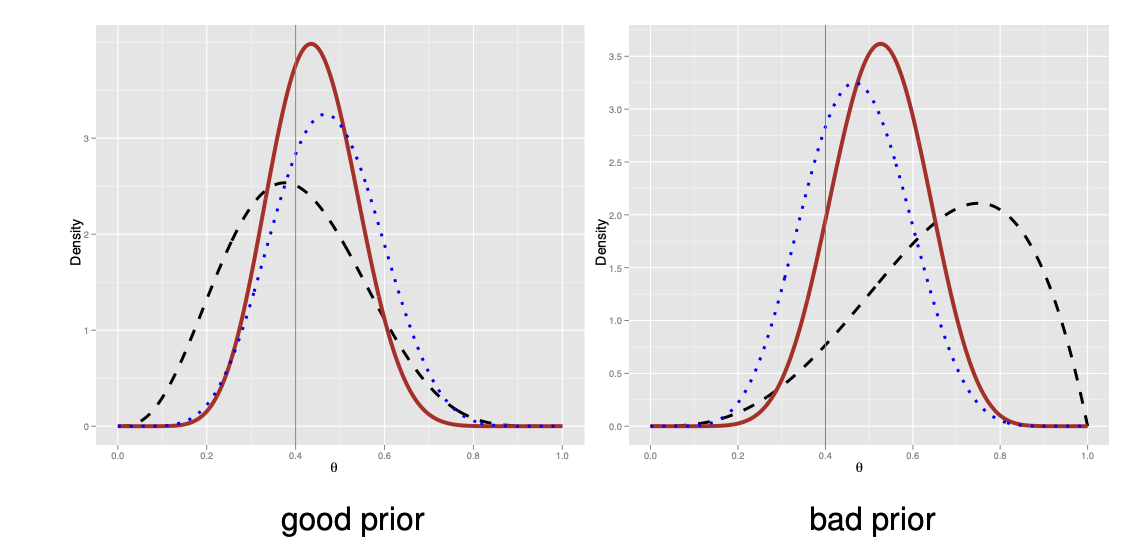

e.g., flip coins, $s=$ number of heads

data points sampled as $X \sim Bernoulli(\theta=0.4)$

$n=15, s=7$ 

- prior distribution: black-dashed $\pi(\theta)$


- likelihood function: blue-dotted $L_n(\theta)$

    we try to maximize the likelihood


- posterior distribution: red-solid  $p(\theta|x_1,...,x_n)$


## Dirichlet prior and multinomial model

**Multinomial model with Dirichlet prior is generalization of Bernoulli model with Beta prior**


- Dirichlet prior distribution on $\theta$

    $\theta$ is random variable, $\alpha$ is param

$$
\pi_{\alpha}(\theta) = \text{Dirichlet}_{\alpha}(\theta) =\frac{\Gamma (\sum _{j=1}^k\alpha _j)}{\prod _{j=1}^k \Gamma (\alpha _j)} \ \prod _{j=1}^k \theta_j^{\alpha _j -1}
$$

where $\frac{\Gamma (\sum _{j=1}^k\alpha _j)}{\prod _{j=1}^k \Gamma (\alpha _j)}$ is normalizing constant

$\alpha = (\alpha_1,..., \alpha_k) \in \mathbb{R}_{+}^k$ is a non-negative vector



- Multinomial model:

    $X$ is random variable, $\theta$ is param, data $x_i \in [k]$

$$
\mathbb{P}(x_i | \theta) = \prod _{j=1}^k \theta_j^{\mathbb{1}(x_i = j)} \Rightarrow \mathbb{P}(x_i = j | \theta) = \theta_j
$$
